In [17]:
import numpy as np
import torch 
import torch.nn as nn
import os
from collections import OrderedDict

from utils.sample_parameters import ParamSamples
from utils.custom_loss import profit_loss, revenue
from utils.train_n_test import TrainTest
from models.LSTM_vanilla import LSTM_

In [18]:
params_dict = {
    # HYPERMARAMETER RANGES
    'BATCH_SIZE': ([128, 256, 512], None), 
    'EPOCHS': ([20, 40, 50], None),
    'OPTIMIZER': ([torch.optim.RMSprop], None),
    'LEARNING_RATE': ([1e-5, 5e-5, 1e-4, 5e-4, 1e-3], None),
    'LOSS': ([torch.nn.MSELoss()], None),
    'EARLY_STOPPING': ([True], None),
    'PATIENCE': (list(range(0,3)), None),
    'MIN_DELTA': ([1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4], None),

    # NETWORK PARAMETER RANGES
    'HIDDEN_DIM': ([128, 256], None),
    'FC_DEPTH':  (np.arange(1,3), None),
    'FC_SIZES': ([128, 256, 512], 
                    {'max_depth': 'FC_DEPTH',
                    'consecutive': -1}),
    'DROPOUT': (np.arange(8)/10, None),
    'NUM_LAYERS':([1,2],None),
    'BIDIRECTIONAL': ([True], None)
}

In [ ]:
N = 5
PKL_NAMES = [i for i in os.listdir('data/tensors') if 'expt0' in i ]
PKL_NAMES = [i for i in PKL_NAMES if 'persistence' not in i ]

In [ ]:
for pkl in PKL_NAMES: 
    PKL_NAME = pkl[:-4] 
    print(PKL_NAME)
    train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')
    persistence = torch.load('data/tensors/'+ PKL_NAME + '_persistence.pkl')
    
    torch.nn.MSELoss()(persistence, test[1])
    
    params = ParamSamples(OrderedDict(params_dict))
    param_samples = params.SampleAll(N)
    
    stats = []
    predictions = []
    for i in np.arange(N): 
        print(param_samples[i])
        run = TrainTest(LSTM_, (train, val, test), param_samples[i], class_size=1)
        run.train()
        stats.append(run.test())
        predictions.append(run.predictions)

    for i in np.arange(N):
        for key,val in stats[i].items():
            param_samples[i][key] = val

    torch.save(param_samples, 'results/LSTM_experiment_N'+str(N)+'.pkl')

3

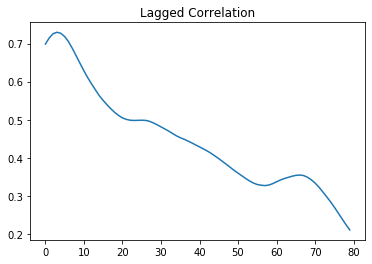

In [34]:
# # Visualise Lagged Correlation
# from utils.visuals import lagged_correlation
# corr = lagged_correlation(stats[0]['predictions'], test[1], plot=True)
# np.amax(corr) 
# np.argmax(corr)   

In [ ]:
# # Can't find a way to make this a function (plot not showing), so putting this in every notebook 
# from matplotlib.animation import FuncAnimation
# %matplotlib notebook

# interval = 50
# windowsize = 100
# test_ = test[1]
# pred = stats[0]['predictions']

# fig  = plt.figure()
# ax   = plt.axes(xlim=(0, windowsize), ylim=(-2, 5))
# ln1, = plt.plot([],[])
# ln2, = plt.plot([],[])

# def update_animation(f):
#     r = np.arange(f, f + windowsize)
#     lim = ax.set_xlim(f, f+ windowsize)
#     ln1.set_data(r, test_[r])
#     ln2.set_data(r, pred[r])

# frames = np.arange(0, len(pred), interval)
# ani = FuncAnimation(fig, update_animation, frames=frames) 
# plt.show()